In [258]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta
df = pd.read_csv('dataset.csv')

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191019 entries, 0 to 191018
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   state                   191019 non-null  object
 1   state_name              191019 non-null  object
 2   state_fips              191019 non-null  int64 
 3   fema_region             191019 non-null  object
 4   overall_outcome         191019 non-null  object
 5   date                    191019 non-null  object
 6   new_results_reported    191019 non-null  int64 
 7   total_results_reported  191019 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 11.7+ MB


In [260]:
# Converting the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# The total number of PCR tests performed as of yesterday in the United States.

In [261]:
# Total tests performed as of yesterday in the United States
df['new_results_reported'].sum()

1043216984

In [262]:
# Grouping data by state and overall outcome. The .max() method will retrieve the most recent date and the highest value of total_results_reported for each of the three outcomes.
df1 = df.groupby(['state', 'overall_outcome'])[['date', 'total_results_reported']].max()
df1

date  total_results_reported
state overall_outcome                                   
AK    Inconclusive    2023-05-17                    5253
      Negative        2023-05-17                 4392927
      Positive        2023-05-17                  399565
AL    Inconclusive    2023-05-09                   18823
      Negative        2023-05-09                 8067491
...                          ...                     ...
WV    Negative        2023-05-17                 5420537
      Positive        2023-05-17                  623189
WY    Inconclusive    2023-05-18                    4013
      Negative        2023-05-18                 1440501
      Positive        2023-05-18                  138376

[167 rows x 2 columns]

In [263]:
# Summing up total results reported for each outcome of each state from the most recent date provided from the dataset.
df1['total_results_reported'].sum()

1043216984

# The 7-day rolling average number of new cases per day for the last 30 days.

In [264]:
df2 = df[['state', 'date', 'overall_outcome', 'new_results_reported']].set_index('date')

In [265]:
# Filtering only by positive cases
df2_positive = df2[df2['overall_outcome']=='Positive']
df2_positive

,state,overall_outcome,new_results_reported
date,,,
2020-03-01,AL,Positive,16
2020-03-02,AL,Positive,6
2020-03-03,AL,Positive,9
2020-03-04,AL,Positive,2
2020-03-05,AL,Positive,6
...,...,...,...
2023-05-14,WY,Positive,5
2023-05-15,WY,Positive,9
2023-05-16,WY,Positive,13


In [287]:
# Getting a sum of total positive cases reported per day
df_positive = df2_positive.groupby('date')['new_results_reported'].sum().to_frame()
df_positive

,new_results_reported
date,
2020-03-01,63
2020-03-02,85
2020-03-03,35
2020-03-04,113
2020-03-05,115
...,...
2023-05-14,3213
2023-05-15,5033
2023-05-16,4332


In [267]:
# Finding the rolling average count of new positive cases
rolling_avg = df_positive['new_results_reported'].rolling(window=7).mean()

In [268]:
# Since the dataframe is sorted by date, we can use tail to find the last 30 days
last_30_days_rolling_avg = rolling_avg.tail(30)

In [269]:
last_30_days_rolling_avg

date
2023-04-19    9875.000000
2023-04-20    9580.571429
2023-04-21    9410.142857
2023-04-22    9249.857143
2023-04-23    9148.285714
2023-04-24    8898.000000
2023-04-25    8708.000000
2023-04-26    8558.000000
2023-04-27    8474.857143
2023-04-28    8385.857143
2023-04-29    8375.142857
2023-04-30    8364.857143
2023-05-01    8262.000000
2023-05-02    8168.857143
2023-05-03    8033.285714
2023-05-04    7969.142857
2023-05-05    7874.571429
2023-05-06    7710.285714
2023-05-07    7618.857143
2023-05-08    7578.142857
2023-05-09    7500.857143
2023-05-10    7307.857143
2023-05-11    6962.857143
2023-05-12    6632.285714
2023-05-13    6379.000000
2023-05-14    6129.285714
2023-05-15    5706.000000
2023-05-16    5109.428571
2023-05-17    4548.000000
2023-05-18    3906.285714
Name: new_results_reported, dtype: float64

Text(0.5, 1.0, '7-day Rolling Average - Positive Covid Cases - Last 30 Days')

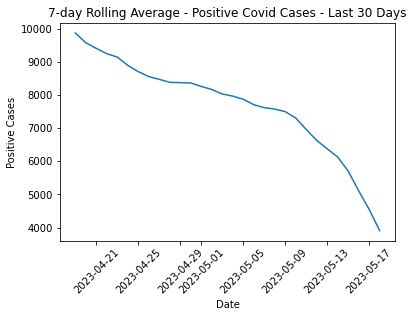

In [270]:
plt.plot(last_30_days_rolling_avg)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Positive Cases')
plt.title('7-day Rolling Average - Positive Covid Cases - Last 30 Days')

# The 10 states with the highest test positivity rate (positive tests / tests performed) for tests performed in the last 30 days.

In [271]:
last_30_days_date = (date.today()-timedelta(days=30)).isoformat()
last_30_days_date

'2023-04-21'

In [272]:
# Filtering the dataframe to include only the dates from the past 30 days
df3 = df[df['date'] >= last_30_days_date][['date', 'state_name', 'overall_outcome', 'new_results_reported']]
df3

,date,state_name,overall_outcome,new_results_reported
3426,2023-04-21,Alabama,Inconclusive,1
3427,2023-04-21,Alabama,Negative,3265
3428,2023-04-21,Alabama,Positive,120
3429,2023-04-22,Alabama,Inconclusive,0
3430,2023-04-22,Alabama,Negative,1309
...,...,...,...,...
191014,2023-05-17,Wyoming,Negative,89
191015,2023-05-17,Wyoming,Positive,6
191016,2023-05-18,Wyoming,Inconclusive,0
191017,2023-05-18,Wyoming,Negative,49


In [285]:
df4 = df3.groupby('state_name').agg('new_results_reported').sum().to_frame().reset_index()
df4.rename(columns={'new_results_reported': 'total_cases_reported'}, inplace=True)
df4.head()

,state_name,total_cases_reported
0,Alabama,66186
1,Alaska,9636
2,Arizona,60795
3,Arkansas,19147
4,California,640619


In [274]:
df3_positive = df3[df3['overall_outcome']=='Positive']

In [275]:
df3_positive = df3_positive.groupby('state_name')['new_results_reported'].sum().reset_index()
df3_positive.rename(columns={'new_results_reported': 'total_positive_tests'}, inplace=True)

In [284]:
df3_positive.head()

,state_name,total_positive_tests,total_cases
0,Alabama,2171,66186
1,Alaska,687,9636
2,Arizona,4744,60795
3,Arkansas,1286,19147
4,California,27500,640619


In [277]:
df3_positive['total_cases'] = df4['total_cases_reported']

In [283]:
df3_positive.head()

,state_name,total_positive_tests,total_cases
0,Alabama,2171,66186
1,Alaska,687,9636
2,Arizona,4744,60795
3,Arkansas,1286,19147
4,California,27500,640619


In [279]:
# Renaming the dataframe by creating a copy of df3_positive
df_positivity_rate = df3_positive.copy()

In [282]:
df_positivity_rate['positivity_rate'] = ((df_positivity_rate['total_positive_tests'] / df_positivity_rate['total_cases']) * 100).round(2)
df_positivity_rate.head()

,state_name,total_positive_tests,total_cases,positivity_rate
0,Alabama,2171,66186,3.28
1,Alaska,687,9636,7.13
2,Arizona,4744,60795,7.80
3,Arkansas,1286,19147,6.72
4,California,27500,640619,4.29


In [281]:
df_positivity_rate.sort_values('positivity_rate', ascending=False).head(10)

,state_name,total_positive_tests,total_cases,positivity_rate
45,U.S. Virgin Islands,50,177,28.25
25,Missouri,3865,20913,18.48
39,Puerto Rico,3972,21679,18.32
42,South Dakota,1673,9744,17.17
11,Guam,256,1604,15.96
49,Washington,4922,34762,14.16
52,Wyoming,581,5006,11.61
31,New Mexico,1944,17450,11.14
12,Hawaii,1994,19391,10.28
28,Nevada,2227,22114,10.07
